Central Business District      4440
South Side Flats               3497
Carrick                        2351
East Allegheny                 2217
Homewood South                 2090
Homewood North                 1969
East Liberty                   1889
Marshall-Shadeland             1516
Bluff                          1502
Mount Washington               1434
Hazelwood                      1396
Brookline                      1390
Lincoln-Lemington-Belmar       1362
Knoxville                      1336
Sheraden                       1285
Allegheny Center               1244
Beechview                      1201
East Hills                     1194
Brighton Heights               1114
Perry South                    1057
Bloomfield                      984
Shadyside                       971
Allentown                       947
Middle Hill                     932
Larimer                         879
Central North Side              853
Crawford-Roberts                839
North Shore                 

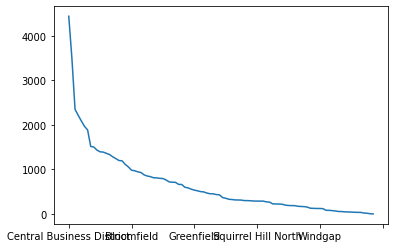

In [2]:
import pandas as pd
import pprint
%matplotlib inline

arrests = pd.read_csv("arrests.tsv", sep="\t")
neighborhood_counts = arrests['INCIDENTNEIGHBORHOOD'].value_counts()
pd.set_option('display.max_rows', None)
print(neighborhood_counts)
neighborhood_counts.plot()

                 Neighborhood  2020_Total_Population
66                  Shadyside                  15317
75        Squirrel Hill South                  15317
12                  Brookline                  13063
74        Squirrel Hill North                  11879
54              North Oakland                  10691
14                    Carrick                  10290
51           Mount Washington                   8710
8                  Bloomfield                   8665
6                   Beechview                   7596
70           South Side Flats                   7467
35                 Greenfield                   7261
11           Brighton Heights                   7105
38              Highland Park                   6235
27               East Liberty                   6187
9                       Bluff                   5882
18            Central Oakland                   5835
15  Central Business District                   5477
61               Point Breeze                 

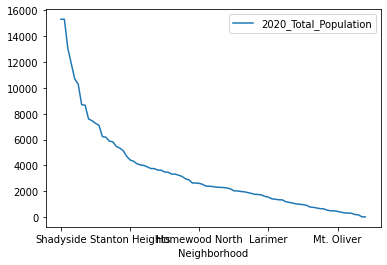

In [27]:
population = pd.read_csv("population.tsv", sep="\t")

population['Neighborhood'] = population['Neighborhood'].replace("Arlington - Arlington Heights (Combined)", "Arlington")
population['Neighborhood'] = population['Neighborhood'].replace("Central Business District (Downtown)", "Central Business District")
population['Neighborhood'] = population['Neighborhood'].replace("Spring Hill-City", "Spring Hill-City View")

pop_data = population[['Neighborhood','2020_Total_Population']]
pop_data = pop_data.sort_values(by = '2020_Total_Population', ascending=False)

print(pop_data)
pop_data.plot(x='Neighborhood', y='2020_Total_Population')

                 Neighborhood  Arrests_Per_Capita
20                    Chateau           23.894737
69                South Shore           10.379310
55                North Shore            2.704319
85                   West End            1.414634
41              Homewood West            1.190031
24             East Allegheny            1.165003
40             Homewood South            0.924779
0            Allegheny Center            0.876674
15  Central Business District            0.810663
39             Homewood North            0.752388
31                   Fineview            0.698246
29                     Esplen            0.621118
43                    Larimer            0.568932
49                Middle Hill            0.530450
5           Bedford Dwellings            0.479798
70           South Side Flats            0.468327
13       California-Kirkbride            0.444288
26                 East Hills            0.412863
2                   Allentown            0.410846


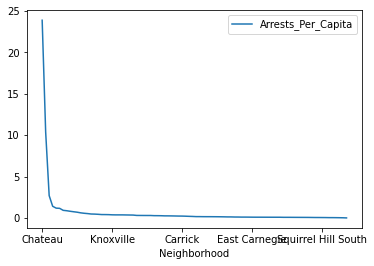

In [28]:
merged_data = pd.merge(neighborhood_counts, pop_data, how='inner', left_index= True, right_on='Neighborhood')
merged_data['Arrests_Per_Capita'] = merged_data['INCIDENTNEIGHBORHOOD'] / merged_data['2020_Total_Population']
merged_data = merged_data.sort_values(by='Arrests_Per_Capita', ascending=False)
print(merged_data[['Neighborhood', 'Arrests_Per_Capita']])
merged_data[['Neighborhood', 'Arrests_Per_Capita']].set_index('Neighborhood').plot()

# Conclusion 
Since we decided to define the "best neighborhood" as the safest, the sub-metric that I chose was the number of arrests per neighborhood. The more arrests per neighborhoods, the less safe the neighborhood is. I used the dataset on Pittsburgh Police Arrest Data. The data orginally suggests that the safest neighborhood is Mt. Oliver. We decided to calculate the per capita to make the data more fair across the three sets. This suggested that the best neighorhood is actually Central Northside. However, my personal favorite is Shadyside. I enjoy Shadyside because of the shops and festivals that they hold over the summer. It makes sense that the number of arrests is higher than Mt. Oliver because there are a lot more events and stores that are in the area. 